# Importing Libraries

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


# Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
wine=pd.read_csv("winequality_red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Exploration/Analysis

In [3]:
#to know shape of the dataset
wine.shape

(1599, 12)

From here you can see that there 1599 rows and 12 columns are present.

In [4]:
#Number of unique valuesin this dataset
for col in wine.columns.values:
    print("Number of unique values of {}:{}".format(col,wine[col].nunique()))

Number of unique values of fixed acidity:96
Number of unique values of volatile acidity:143
Number of unique values of citric acid:80
Number of unique values of residual sugar:91
Number of unique values of chlorides:153
Number of unique values of free sulfur dioxide:60
Number of unique values of total sulfur dioxide:144
Number of unique values of density:436
Number of unique values of pH:89
Number of unique values of sulphates:96
Number of unique values of alcohol:65
Number of unique values of quality:6


The feature fixed acidity has more number of unique values and quality feature has less number of unique values .

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

11 of the features are floats, 1 is integers .



In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Summary Statistics

In [7]:
wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1.The mean is more than median (50th percentile) in all columns


2.There is a large difference in 75% percentile and max in residual sugar,free sulfur dioxide,total sulfur dioxide


3.The  1 and 2 observations suggest that there are extreme outliers present 

In [8]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Tail gives last five rows in this dataset

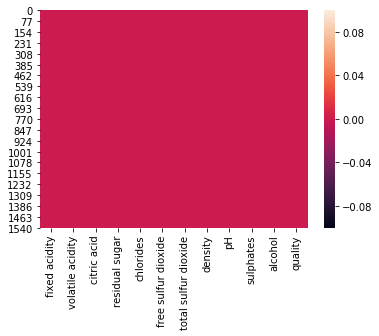

In [9]:
sns.heatmap(wine.isnull())

from here it is clear that there is no null data

In [10]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
bins=(2,6.5,8)
group=['Bad','Good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group)

In [12]:
#now assign kabels to quality
label_quality=LabelEncoder()

In [13]:
#Bad becomes 0,and good becomes 1
wine['quality']=label_quality.fit_transform(wine['quality'])

# Data Visualization

### Chlorides and Alcohol

In [14]:
wine['chlorides'].isnull().sum()

0

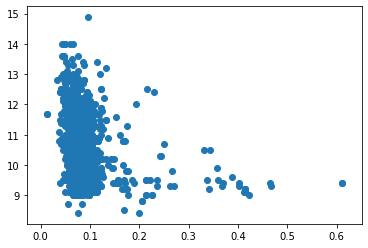

In [15]:
plt.scatter(wine['chlorides'],wine['alcohol'],cmap='orange')

it is clear that mostly chlorides present in between the alcohol range between 9 to 13 and chloride percentage is 10% to 20% 

In [16]:
#to check correlation
wine_cor=wine.corr()
wine_cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


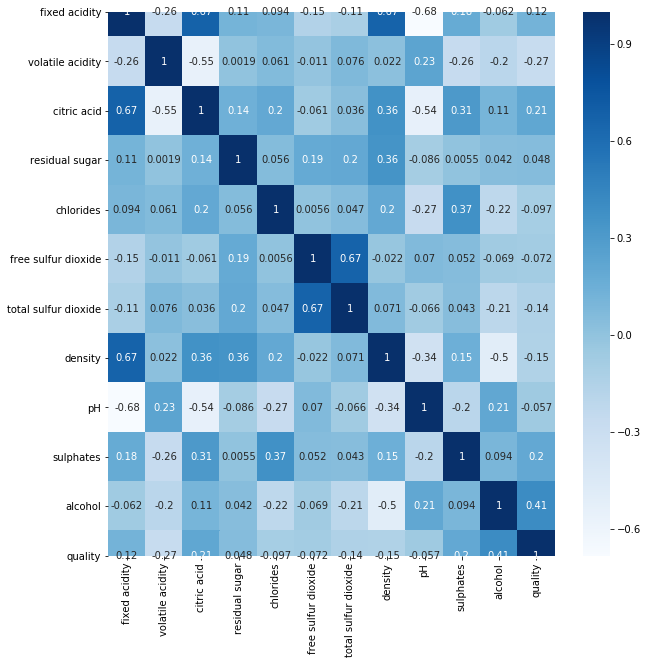

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_cor,cmap='Blues',annot=True)

density has a strong positive correlation with residual sugar, whereas it has a strong negative correlation with alcohol.


pH & fixed acidity has negative correlation.


density & fixed acidity has positive correlation.


citric acid & fixed acidity has positive correlation.

citric acid & volatile acidity has negative correlation.


free sulphur dioxide & total sulphur dioxide has positive correlation.

It's better to drop pH column

In [18]:
wine.drop('pH',axis=1,inplace=True)

In [19]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0


Now you can see pH column had been Droped

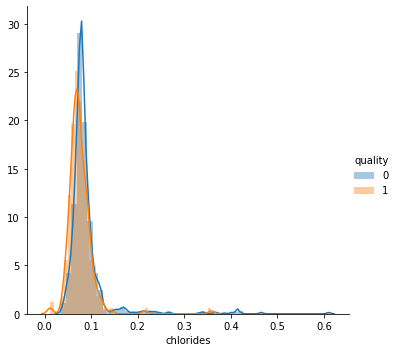

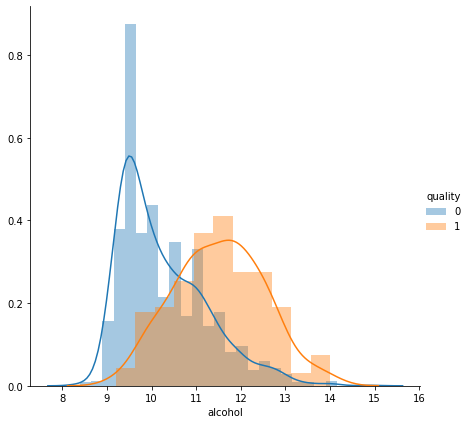

In [20]:
#distribution plots
sns.FacetGrid(wine,hue='quality',size=5).map(sns.distplot,'chlorides').add_legend()
sns.FacetGrid(wine,hue='quality',size=6).map(sns.distplot,'alcohol').add_legend()

From here Chlorides range in between (0.0-0.1) quality of wine is More and at chloride value 0.5 the quality of wine is low 
Finally i had observed one thing if Chlorides range is increases the quality of wine is going down .

From here alcohol range in between (9-12) quality of wine is More and alcohol value is 9 quality of wine more 

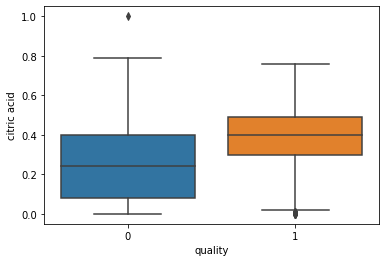

In [21]:
sns.boxplot(x='quality',y='citric acid',data=wine)

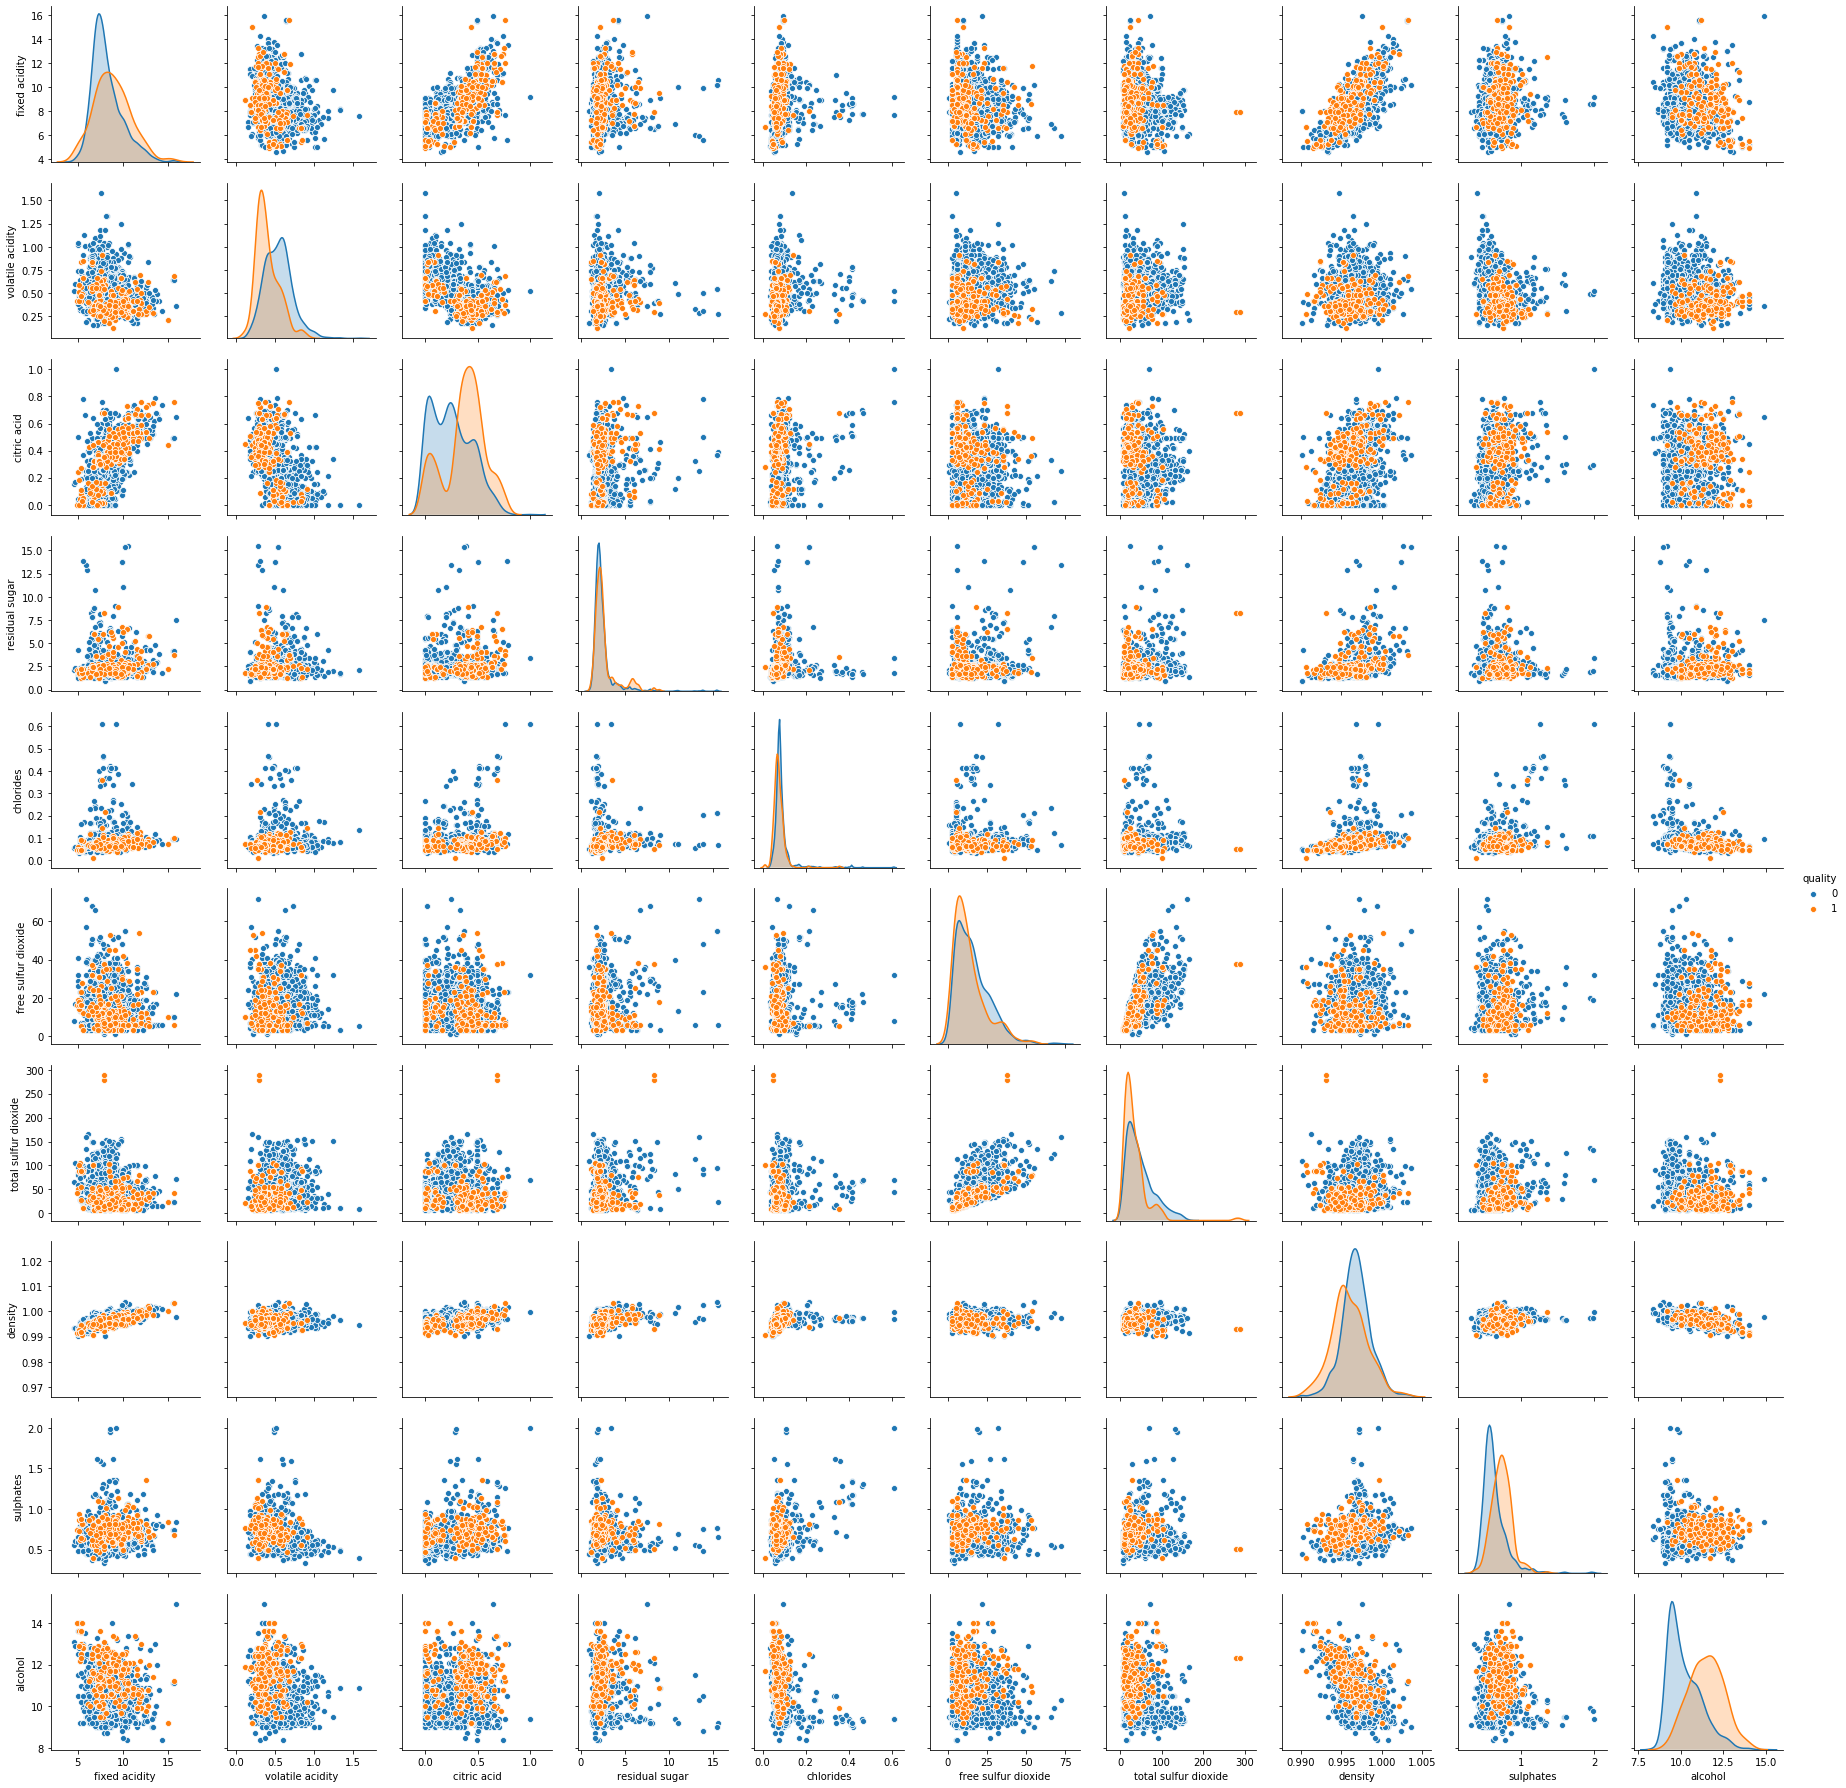

In [22]:
sns.pairplot(wine ,hue ='quality', vars =['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'])

# plotting the outliers


In [23]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

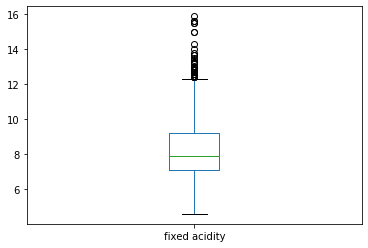

In [24]:
wine['fixed acidity'].plot.box()

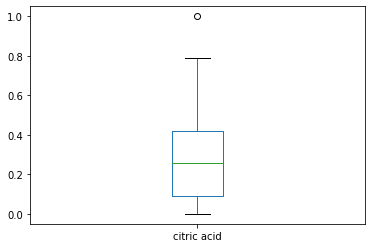

In [25]:
wine['citric acid'].plot.box()

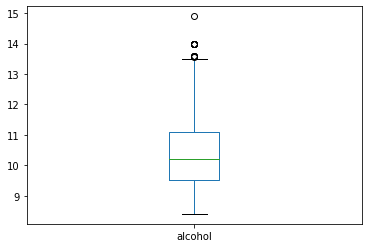

In [26]:
wine['alcohol'].plot.box()

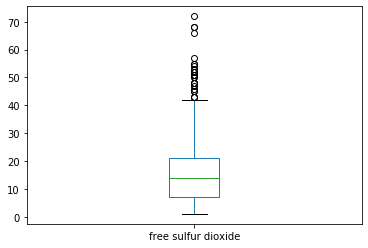

In [27]:
wine['free sulfur dioxide'].plot.box()

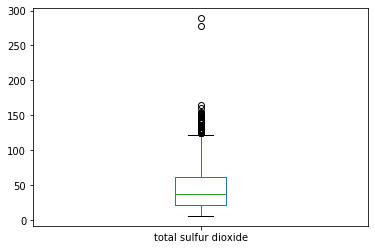

In [28]:
wine['total sulfur dioxide'].plot.box()

In [29]:
collist=wine.columns.values
ncol=12
nrows=10

In [30]:
plt.subplot?

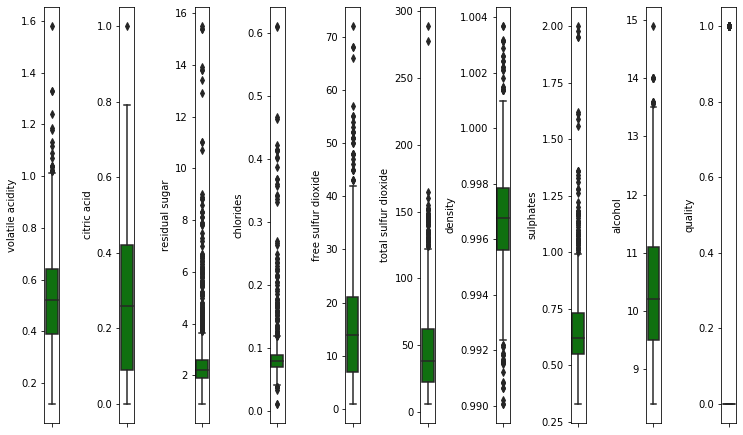

In [31]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(wine[collist[i]],color='green',orient='v')
    plt.tight_layout()

From you can observe that there alot of outliers present.And need to remove those outliers 

In [32]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(wine))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.39625599]])

In [33]:
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          57,   81,   81,   83,   86,   88,   91,   92,  106,  106,  109,
         120,  126,  127,  142,  144,  147,  151,  151,  151,  163,  164,
         169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
         274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
         391,  396,  396,  400,  400,  442,  442,  451,  467,  480,  480,
         494,  515,  544,  554,  554,  555,  555,  557,  557,  568,  584,
         588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
         652,  652,  672,  672,  684,  690,  692,  692,  723,  724,  730,
         754,  776,  777,  795,  821,  836,  837,  889,  911,  917,  923,
         925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079,
        1079, 1081, 1081, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235,
        1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288, 1289, 1295,
        1296, 1299, 1312, 1319, 1319, 

In [34]:
#row and column
z[13][8]

5.32210116796055

In [35]:
z[1493][8]

0.4021672914252252

In [36]:
z[1574][1]

1.2168491916947248

In [37]:
wine_new=wine[(z<3).all(axis=1)]

In [38]:
wine_new.shape

(1465, 11)

In [39]:
wine.shape

(1599, 11)

141 rows had been removed as an outliers

# To check distribution of skewness

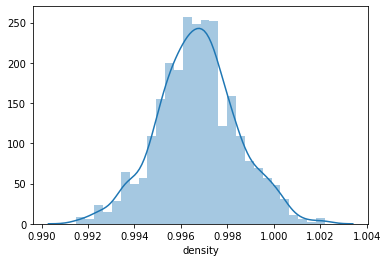

In [40]:
sns.distplot(wine_new['density'])

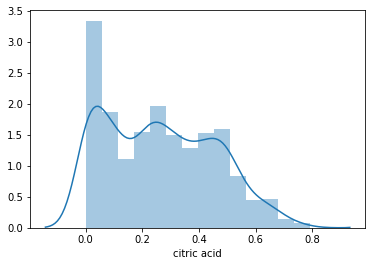

In [41]:

sns.distplot(wine_new['citric acid'])

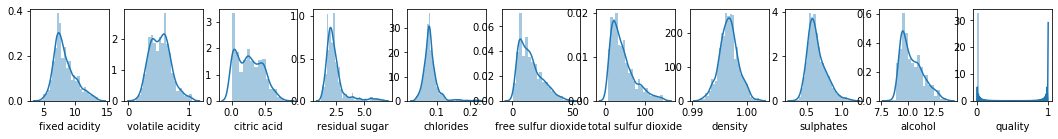

In [42]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(wine_new[collist[i]])

Density and Sulphates and fixed acidity  are  Noramally distributed .

## Checking and removing Skewness

In [43]:
wine_new.skew()

fixed acidity           0.791266
volatile acidity        0.388565
citric acid             0.297122
residual sugar          2.447710
chlorides               2.273578
free sulfur dioxide     0.869022
total sulfur dioxide    1.182257
density                 0.037632
sulphates               0.898820
alcohol                 0.753354
quality                 2.102728
dtype: float64

In [44]:
x=wine_new.iloc[:,:-1]
x.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,0.66,11.0


In [45]:
y=wine_new.iloc[:,-1:]
y.head()

,quality
0,0
1,0
2,0
3,0
4,0


In [46]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [47]:
x.skew()

fixed acidity           0.373105
volatile acidity        0.388565
citric acid             0.297122
residual sugar          1.529624
chlorides               2.073173
free sulfur dioxide    -0.168821
total sulfur dioxide   -0.056102
density                 0.037632
sulphates               0.674739
alcohol                 0.600066
dtype: float64

In [48]:
#drop the negatively correlated columns
# remove the outliers

In [49]:
#Data cleaning is done

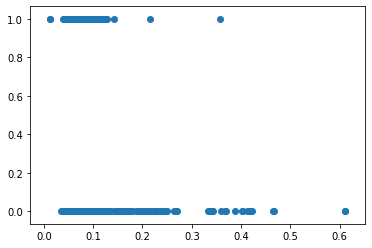

In [50]:
plt.scatter(wine['chlorides'],wine['quality'])

Chlorides range between(0.0 to 0.3) the quality of wine good and it's highly co-relate with Chlorides

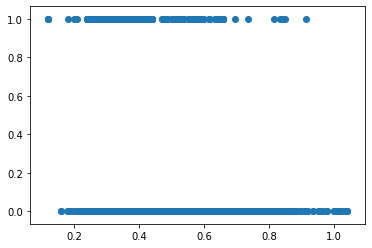

In [51]:
plt.scatter(x['volatile acidity'],y['quality'])
plt.show()

In [52]:
wine_new.drop('volatile acidity',inplace=True,axis=1)

In [53]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0


From here you can observe that column had been droped

In [54]:
x['quality']=wine_new['quality']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,2.128232,0.70,0.00,1.064711,0.073250,2.484907,3.555348,0.9978,0.444686,2.341806,0
1,2.174752,0.88,0.00,1.280934,0.093490,3.258097,4.219508,0.9968,0.518794,2.379546,0
2,2.174752,0.76,0.04,1.193922,0.088011,2.772589,4.007333,0.9970,0.500775,2.379546,0
3,2.501436,0.28,0.56,1.064711,0.072321,2.890372,4.110874,0.9980,0.457425,2.379546,0
4,2.128232,0.70,0.00,1.064711,0.073250,2.484907,3.555348,0.9978,0.444686,2.341806,0


## Building Machine Learning Model

In [55]:
X=x.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,2.128232,0.70,0.00,1.064711,0.073250,2.484907,3.555348,0.9978,0.444686,2.341806
1,2.174752,0.88,0.00,1.280934,0.093490,3.258097,4.219508,0.9968,0.518794,2.379546
2,2.174752,0.76,0.04,1.193922,0.088011,2.772589,4.007333,0.9970,0.500775,2.379546
3,2.501436,0.28,0.56,1.064711,0.072321,2.890372,4.110874,0.9980,0.457425,2.379546
4,2.128232,0.70,0.00,1.064711,0.073250,2.484907,3.555348,0.9978,0.444686,2.341806


In [56]:
Y=x.iloc[:,-1:]
Y.head()

,quality
0,0
1,0
2,0
3,0
4,0


In [57]:
X.shape

(1465, 10)

In [58]:
Y.shape

(1465, 1)

In [76]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=43)

In [77]:
train_X.shape

(1172, 10)

In [78]:
Y.ndim

2

In [79]:
train_Y.shape

(1172, 1)

In [80]:
test_X.shape

(293, 10)

In [81]:
test_Y.shape

(293, 1)

In [82]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [83]:
train_X=sc.fit_transform(train_X)
test_X=sc.fit_transform(test_X)

In [84]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

************** DecisionTreeClassifier ***********


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy score 0.8703071672354948
Cross-val-score= 0.8223863925429484


roc_auc_score 0.7350102203043379


              precision    recall  f1-score   support

           0       0.94      0.91      0.93       259
           1       0.45      0.56      0.50        34

    accuracy                           0.87       293
   macro avg       0.70      0.74      0.71       293
weighted avg       0.88      0.87      0.88       293



[[236  23]
 [ 15  19]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


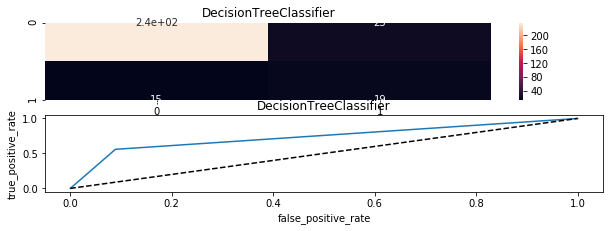

************** RandomForestClassifier ***********


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.9283276450511946
Cross-val-score= 0.8805402131233832


roc_auc_score 0.7295026118555532


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       259
           1       0.84      0.47      0.60        34

    accuracy                           0.93       293
   macro avg       0.89      0.73      0.78       293
weighted avg       0.92      0.93      0.92       293



[[256   3]
 [ 18  16

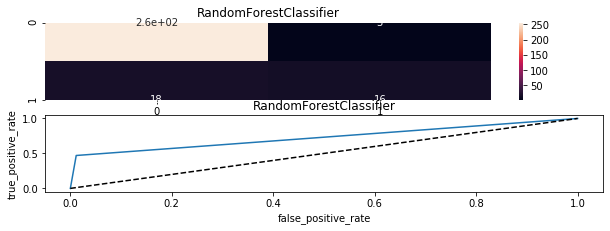

************** KNeighborsClassifier ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy score 0.8907849829351536
Cross-val-score= 0.8504542283407254


roc_auc_score 0.7210424710424711


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       259
           1       0.53      0.50      0.52        34

    accuracy                           0.89       293
   macro avg       0.73      0.72      0.73       293
weighted avg       0.89      0.89      0.89       293



[[244  15]
 [ 17  17]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


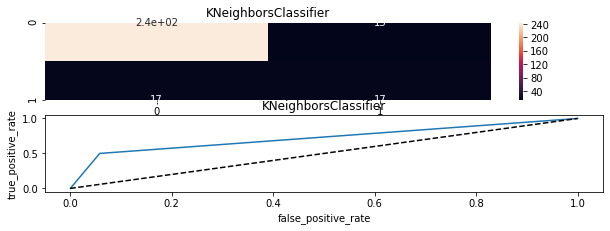

************** SGDClassifier ***********


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


accuracy score 0.9180887372013652
Cross-val-score= 0.8210720015514535


roc_auc_score 0.7748126277538043


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       259
           1       0.67      0.59      0.62        34

    accuracy                           0.92       293
   macro avg       0.81      0.77      0.79       293
weighted avg       0.91      0.92      0.92       293



[[249  10]
 [ 14  20]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


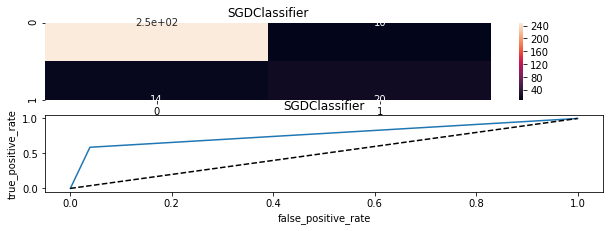

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.9112627986348123
Cross-val-score= 0.8709927917853554


roc_auc_score 0.7070747217806042


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       259
           1       0.68      0.44      0.54        34

    accuracy                           0.91       293
   macro avg       0.81      0.71      0.74       293
weighted avg       0.90      0.91      0.90       293



[[252   7]
 [ 19  15]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


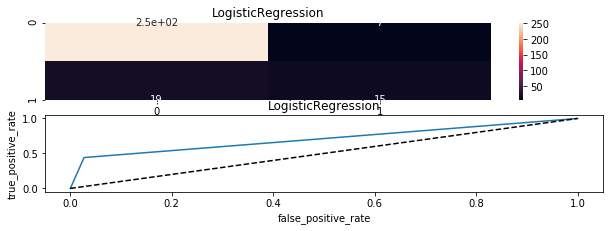

In [85]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))



#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(train_X,train_Y)
    print(model)
    pred=model.predict(test_X)
    print('\n')
    acc=accuracy_score(test_Y,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv=model_selection.cross_val_score(model,X,Y,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_Y,pred)
    roc_auc=roc_auc_score(test_Y,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(test_Y,pred))
    print('\n')
    cm=confusion_matrix(test_Y,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [86]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result

,Model,cvs,score,rocscore
0,DecisionTreeClassifier,82.238639,87.030717,73.501022
1,RandomForestClassifier,88.054021,92.832765,72.950261
2,KNeighborsClassifier,85.045423,89.078498,72.104247
3,SGDClassifier,82.107200,91.808874,77.481263
4,LogisticRegression,87.099279,91.126280,70.707472


In [87]:
#predict the value
pred=rfc.predict(test_X)
print('predicted quality of wine:',pred)
print('actual quality of wine',test_Y)

predicted quality of wine: [0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
actual quality of wine       quality
930         0
1002        1
1143        0
802         1
807         1
...       ...
1255        0
357         1
1585        0
585         0
1120        1

[293 rows x 1 columns]


## Feature Importance

In [88]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
alcohol,0.168
sulphates,0.154
volatile acidity,0.100
citric acid,0.096
density,0.096
total sulfur dioxide,0.094
residual sugar,0.081
chlorides,0.081
fixed acidity,0.071


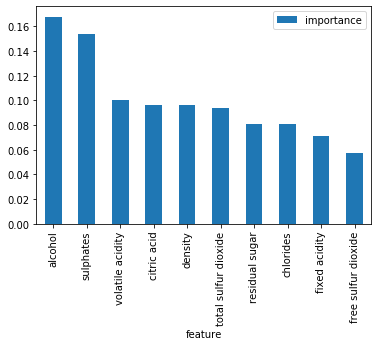

In [89]:
importances.plot.bar()

## Conclusion

free sulfur dioxide doesn’t play a significant role in our random forest classifiers prediction process.
because of that I will drop them from the dataset and train the classifier again

## saving model

In [90]:
wine_new=pd.DataFrame(pred)
wine_new.to_csv('rfc_quality_of_wine.csv')

In [91]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfc,'quality of wine.obj')
#load the model from a file
lg_from_joblib=joblib.load('quality of wine.obj')
#use the loaded model to make prediction
lg_from_joblib.predict(test_X)

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1])